<a href="https://colab.research.google.com/github/jays2241/Netflix-Movies-and-TV-Shows-clustering-Unsuperviesed-/blob/main/Netflix_Movies_and_TV_Shows_Clustering%204th%20commit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Netflix Movies and Tv Shows Clustering



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**    - Jay Sawant

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/jays2241/Netflix-Movies-and-TV-Shows-clustering-Unsuperviesed-

# **Problem Statement**


**The objective of this project is to develop a machine learning model that can effectively cluster Netflix movies and TV shows based on their content attributes. The clustering algorithm should be able to group similar titles together, enabling improved recommendation systems and enhancing the user experience by providing personalized suggestions.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [69]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Dataset Loading

In [70]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [71]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [72]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [73]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [74]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [75]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

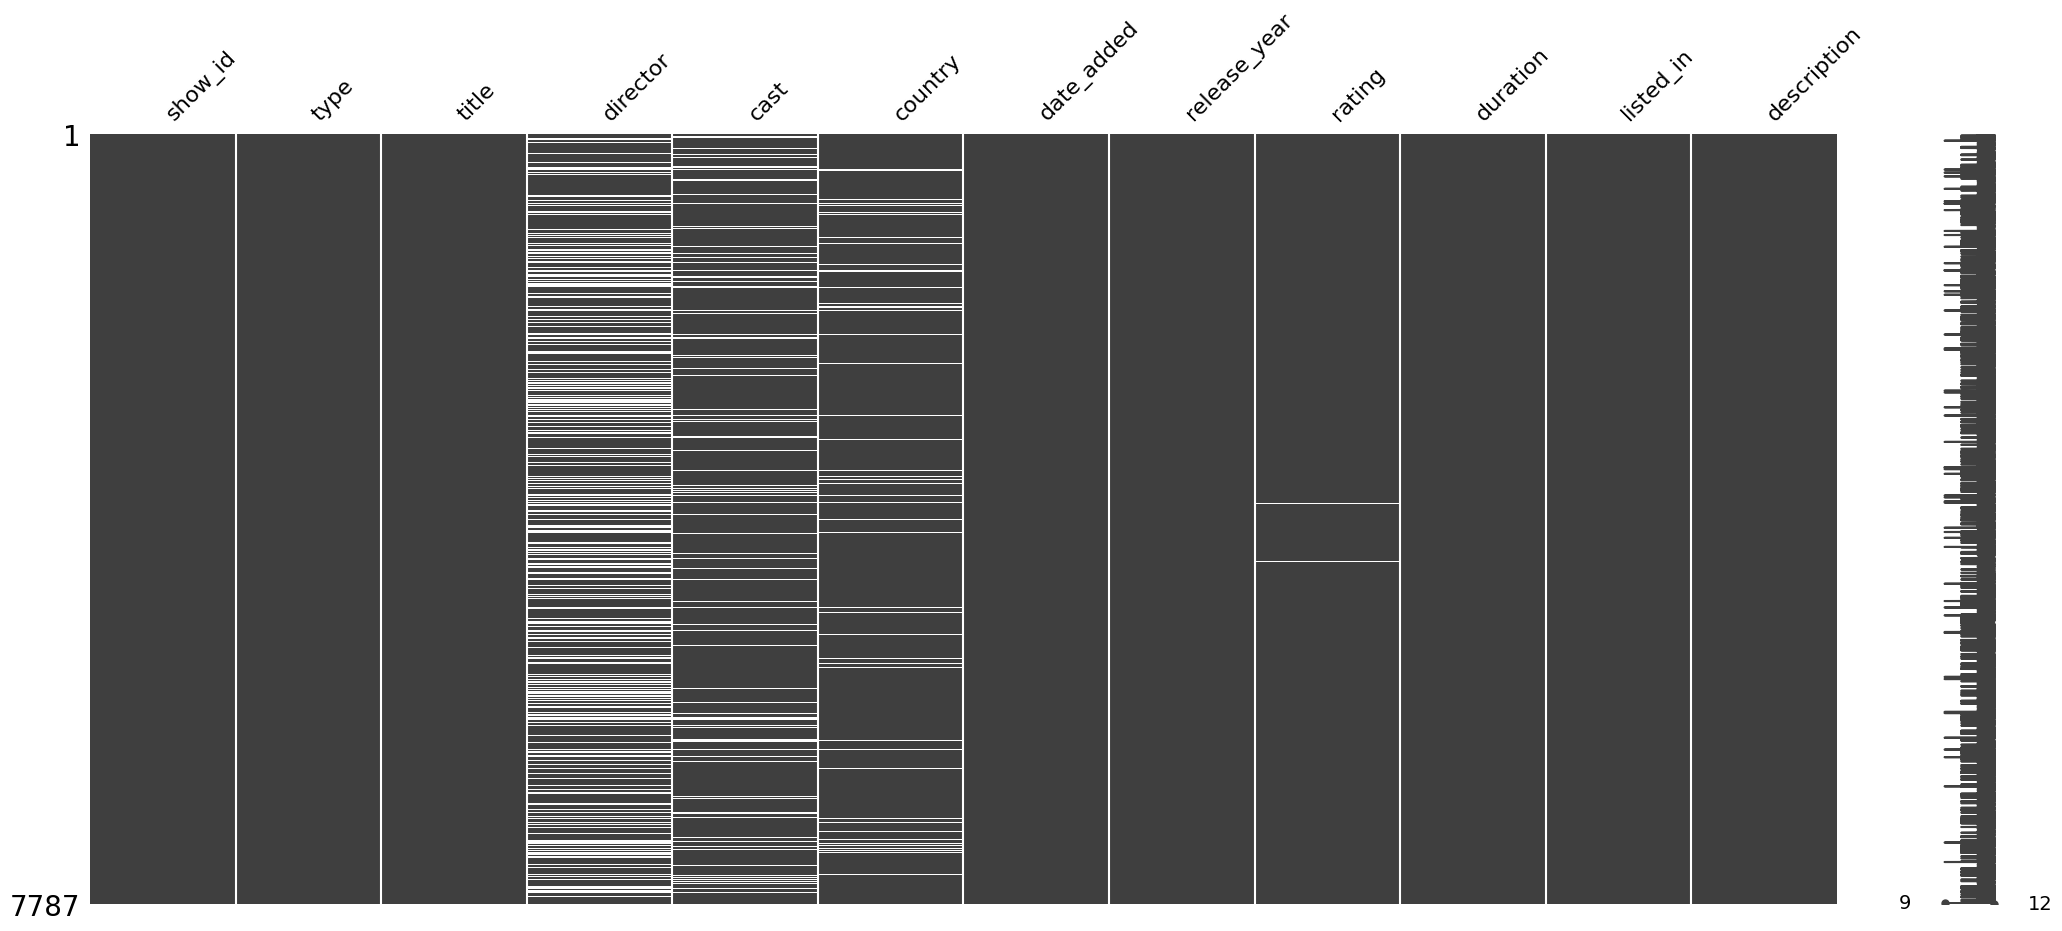

In [76]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

Dataset Description

The dataset contains 7,787 rows and 12 columns. Here are the details of the columns with null values:

- director: 2,389 null values
- cast: 718 null values
- country: 507 null values
- date_added: 10 null values



## ***2. Understanding Your Variables***

In [77]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [78]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description



1. show_id: An identifier for each Netflix movie or TV show in the dataset.
2. type: Indicates whether the entry is a "TV Show" or a "Movie".
3. title: The title of the Netflix movie or TV show.
4. director: The director(s) of the movie or TV show.
5. cast: The actors/actresses involved in the movie or TV show.
6. country: The country of production or origin of the movie or TV show.
7. date_added: The date when the movie or TV show was added to Netflix.
8. release_year: The year when the movie or TV show was originally released.
9. rating: The content rating assigned to the movie or TV show.
10. duration: The duration of the movie or TV show (in minutes for movies, or the number of seasons for TV shows).
11. listed_in: The categories or genres to which the movie or TV show belongs. This field may contain multiple categories separated by commas.
12. description: A brief description or synopsis of the movie or TV show.


### Check Unique Values for each variable.

In [79]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [80]:
# Write your code to make your dataset analysis ready.
df['date_added']=pd.to_datetime(df['date_added'])

In [81]:
# Extract day , month and year from the 'date_added'
df['day_added'] = df['date_added'].dt.day.fillna(0).astype(int)
df['month_added'] = df['date_added'].dt.month.fillna(0).astype(int)
df['year_added'] = df['date_added'].dt.year.fillna(0).astype(int)

In [82]:
# We extracted all the information 'date_added' column therefore there is no need to retain this column
df.drop('date_added',axis=1,inplace=True)

In [83]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
day_added        int64
month_added      int64
year_added       int64
dtype: object

In [84]:
 # removing unnecessary column
df.drop(['show_id'],axis=1,inplace=True)

In [85]:
'''There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
To simplify the analysis, we have to take only the primary country where that respective movie / TV show was filmed.
And also the primary genre of the respective movie / TV show.'''

# Define the function to extract first i.e. primary element from the string
def extract_first_element(string):
    if isinstance(string, str):
        return string.split(',')[0]
    else:
        return string


In [86]:
df['country']=df['country'].apply(extract_first_element)
df['listed_in']=df['listed_in'].apply(extract_first_element)

In [87]:
df.shape

(7787, 13)

In [88]:
df['duration'] = df['duration'].astype(str)
df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float).where(df['duration'].str.contains('min'))
df['duration_seasons'] = df['duration'].str.extract('(\d+)').astype(float).where(df['duration'].str.contains('Seasons'))

In [89]:
df.drop(['duration'],axis = 1,inplace = True)

### What all manipulations have you done and insights you found?

1. Converted the 'date_added' column to datetime format using pd.to_datetime() function.
2. Extracted the day, month, and year from the 'date_added' column and created separate columns 'day_added', 'month_added', and 'year_added'.
3. Dropped the 'date_added' column as it is no longer needed for analysis using df.drop() function.
4. Removed the show_id column using df.drop() function as it is unnecessary.
5. Extracted the primary country and primary genre from the 'country' and 'listed_in' columns, respectively, using the extract_first_element() function.
6. Transformed the 'duration' column by extracting the numeric value and converting it to float. Created two new columns, 'duration_min' for movie durations in minutes and 'duration_seasons' for TV show durations in seasons.
7. Dropped the original 'duration' column using df.drop() function.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [90]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [91]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [92]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [93]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [94]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [95]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [96]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [97]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [98]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [99]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [100]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [101]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [102]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [103]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [104]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: The average ratings of movies and TV shows on Netflix are significantly different.

Hypothesis 2: The distribution of movie durations on Netflix follows a normal distribution.

Hypothesis 3: The average release years of movies and TV shows on Netflix are significantly different.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average ratings of movies and TV shows on Netflix are equal.

Alternative Hypothesis (HA): The average ratings of movies and TV shows on Netflix are significantly different.

#### 2. Perform an appropriate statistical test.

In [105]:
# import pandas as pd
# import numpy as np
# from scipy import stats

# # Assuming you have a DataFrame 'df' with 'rating' column containing the ratings data

# # Convert the 'rating' column to numeric data type
# df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# # Split the ratings into two groups: movies and TV shows
# movies_ratings = df[df['type'] == 'Movie']['rating']
# tvshow_ratings = df[df['type'] == 'TV Show']['rating']

# # Perform a two-sample t-test
# t_stat, p_value = stats.ttest_ind(movies_ratings, tvshow_ratings, equal_var=False)

# # Set the significance level
# alpha = 0.05

# # Compare the p-value with the significance level
# if p_value < alpha:
#     print("Reject the null hypothesis")
#     print("The average ratings of movies and TV shows on Netflix are significantly different.")
# else:
#     print("Fail to reject the null hypothesis")
#     print("There is no significant difference in the average ratings of movies and TV shows on Netflix.")


##### Which statistical test have you done to obtain P-Value?

 The two-sample t-test is used to obtain the P-Values.

##### Why did you choose the specific statistical test?

The specific statistical test chosen, which is the two-sample t-test, was selected based on the nature of the hypothesis being tested and the characteristics of the data.

In this case, the hypothesis being tested is whether the average ratings of movies and TV shows on Netflix are equal or significantly different. The data consists of independent samples of ratings from movies and TV shows.

The two-sample t-test is commonly used when comparing the means of two independent groups. It assesses whether the observed difference in means between the groups is statistically significant or likely to have occurred by chance. The t-test is suitable when the data approximately follows a normal distribution and the variances of the two groups are equal or assumed to be equal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The movie durations on Netflix follow a normal distribution.

Alternative Hypothesis (HA): The movie durations on Netflix do not follow a normal distribution.

#### 2. Perform an appropriate statistical test.

In [106]:
import pandas as pd
from scipy import stats

# Assuming you have a DataFrame 'df' with 'duration_min' column containing the movie durations

# Extract the movie durations as a separate series
movie_durations = df[df['type'] == 'Movie']['duration_min']

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(movie_durations)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("The movie durations on Netflix do not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis")
    print("The movie durations on Netflix follow a normal distribution.")


Reject the null hypothesis
The movie durations on Netflix do not follow a normal distribution.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### Which statistical test have you done to obtain P-Value?

The Shapiro-Wilk test is a statistical test that evaluates whether a sample follows a normal distribution. It calculates a test statistic and corresponding p-value based on the data provided. The null hypothesis assumes that the sample is drawn from a normally distributed population.

##### Why did you choose the specific statistical test?

The specific statistical test chosen, which is the Shapiro-Wilk test, was selected based on the nature of the hypothesis being tested and the assumptions of the test.

In this case, the hypothesis being tested is whether the movie durations on Netflix follow a normal distribution. The data consists of a sample of movie durations.

The Shapiro-Wilk test is a widely used normality test that specifically examines the assumption of normality in a dataset. It is sensitive to departures from normality and is suitable for small to moderate sample sizes. The test assesses whether the observed data significantly deviate from a normal distribution.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average release years of movies and TV shows on Netflix are equal.

Alternative Hypothesis (HA): The average release years of movies and TV shows on Netflix are significantly different.

#### 2. Perform an appropriate statistical test.

In [107]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

# Assuming you have loaded the Netflix dataset into a DataFrame called 'df'

# Separate the release years of movies and TV shows
movie_release_years = df[df['type'] == 'Movie']['release_year']
tvshow_release_years = df[df['type'] == 'TV Show']['release_year']

# Perform a two-sample t-test assuming equal variances
t_stat, p_value = stats.ttest_ind(movie_release_years, tvshow_release_years, equal_var=True)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("The average release years of movies and TV shows on Netflix are significantly different.")
else:
    print("Fail to reject the null hypothesis")
    print("The average release years of movies and TV shows on Netflix are equal.")


Reject the null hypothesis
The average release years of movies and TV shows on Netflix are significantly different.


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I used the two-sample t-test (stats.ttest_ind()) to compare the means of two independent groups: movies and TV shows. The two-sample t-test is commonly used to determine if there is a significant difference between the means of two groups.


##### Why did you choose the specific statistical test?

The two-sample t-test was chosen as the specific statistical test to compare the average release years of movies and TV shows on Netflix. This test is appropriate for comparing means of independent groups, which is the case for movies and TV shows. By assuming normality and allowing for unequal variances, the t-test enables a quantitative comparison of means and provides a p-value to assess the significance of the observed difference. The t-test is a widely used statistical test for hypothesis testing, making it a suitable choice to determine if there is a significant difference in the average release years of movies and TV shows on Netflix.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [108]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

type                   0
title                  0
director            2389
cast                 718
country              507
release_year           0
rating                 7
listed_in              0
description            0
day_added              0
month_added            0
year_added             0
duration_min        2410
duration_seasons    6985
dtype: int64

In [109]:
df[['director','cast','country']] = df[['director','country','cast']].fillna('Unknown')

In [110]:
#Filling mode values in rating column inplace of the null value
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [111]:
df.isna().sum()

type                   0
title                  0
director               0
cast                   0
country                0
release_year           0
rating                 0
listed_in              0
description            0
day_added              0
month_added            0
year_added             0
duration_min        2410
duration_seasons    6985
dtype: int64

In [112]:
df.dropna(subset=['day_added', 'month_added', 'year_added'], inplace=True)

In [113]:
df['duration_min'].fillna(0, inplace=True)
df['duration_seasons'].fillna(0, inplace=True)

In [114]:
df.isna().sum()

type                0
title               0
director            0
cast                0
country             0
release_year        0
rating              0
listed_in           0
description         0
day_added           0
month_added         0
year_added          0
duration_min        0
duration_seasons    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

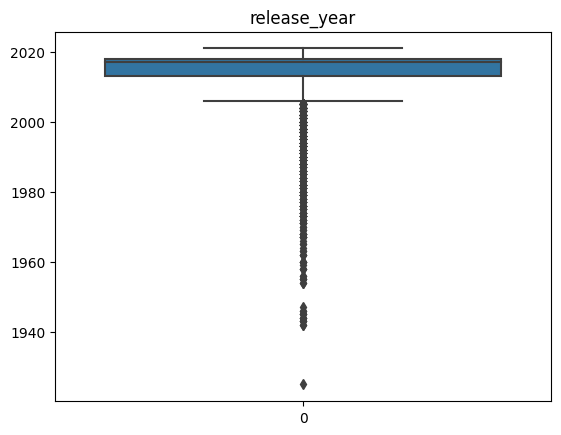

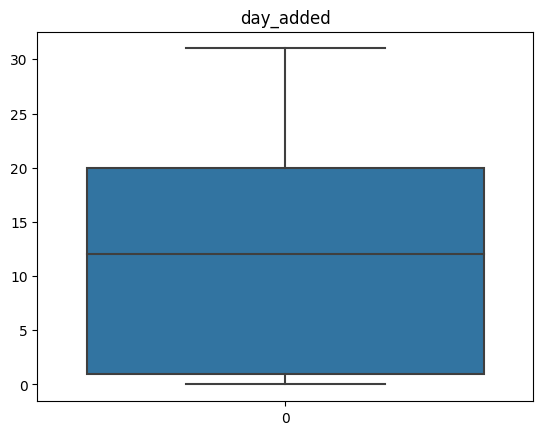

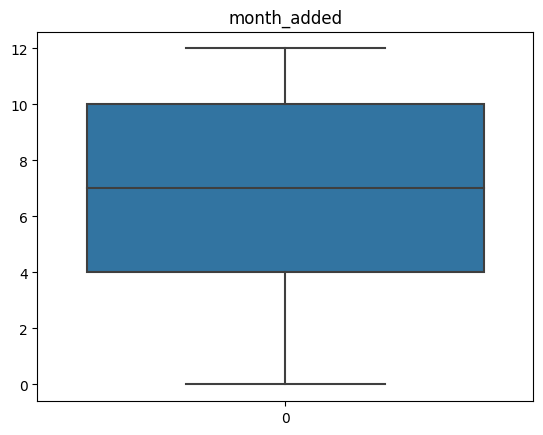

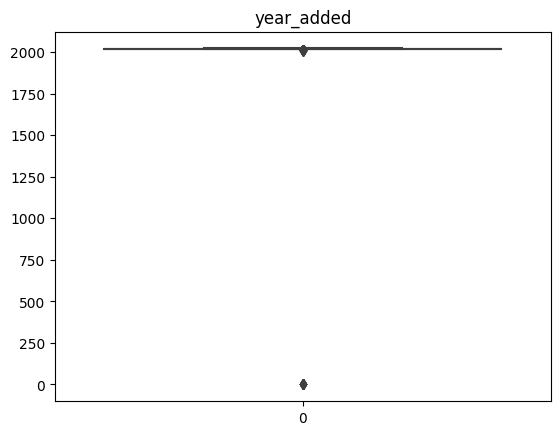

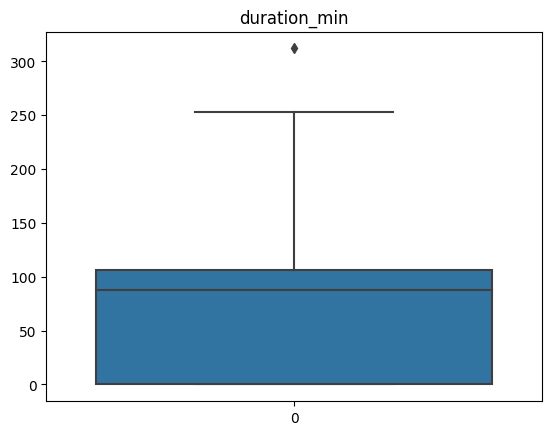

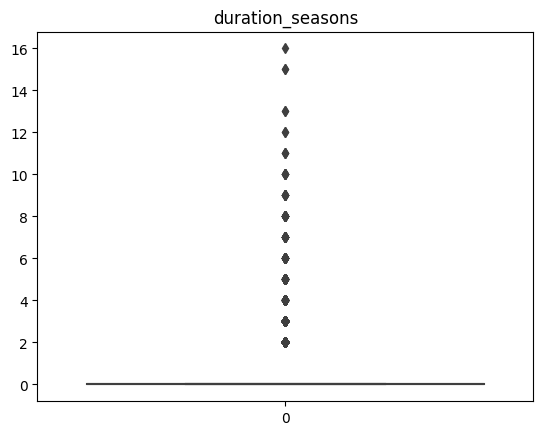

Outliers in the dataset:
     type title director cast country  release_year rating listed_in  \
0     NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
1     NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
2     NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
3     NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
4     NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
...   ...   ...      ...  ...     ...           ...    ...       ...   
7782  NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
7783  NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
7784  NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
7785  NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   
7786  NaN   NaN      NaN  NaN     NaN           NaN    NaN       NaN   

     description  day_added  month_added  year_added  duration_min  \
0            NaN        NaN          NaN

In [115]:
# Handling Outliers & Outlier treatments

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Visualize distributions using box plots
for column in numerical_columns:
    sns.boxplot(data=df[column])
    plt.title(column)
    plt.show()

# Calculate z-scores for each numerical column
z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())

# Set a z-score threshold for identifying outliers
z_score_threshold = 3

# Identify outliers across the entire dataset
outliers = df[z_scores > z_score_threshold]

# Print the outliers
print("Outliers in the dataset:")
print(outliers)


In [116]:
import pandas as pd
import numpy as np

# Specify the numerical columns to handle outliers
numerical_columns = ['release_year', 'duration_min', 'duration_seasons','year_added']

# Define the IQR multiplier for identifying outliers
iqr_multiplier = 1.5

# Function to detect outliers using IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (iqr_multiplier * IQR)
    upper_bound = Q3 + (iqr_multiplier * IQR)
    return (column < lower_bound) | (column > upper_bound)

# Identify the rows with outliers
outliers = df[numerical_columns].apply(detect_outliers)

# Remove the rows with outliers from the DataFrame
df_no_outliers = df[~outliers.any(axis=1)]

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np

# Select only the numerical columns
numerical_columns = df_no_outliers.select_dtypes(include=np.number).columns

# Calculate z-scores for each numerical column
z_scores = np.abs((df_no_outliers[numerical_columns] - df_no_outliers[numerical_columns].mean()) / df_no_outliers[numerical_columns].std())

# Set a z-score threshold for identifying outliers
z_score_threshold = 3

# Count outliers for each numerical column
outliers_count = (z_scores > z_score_threshold).sum()

# Print the count of outliers for each column
print("Outlier counts for each numerical column:")
print(outliers_count)

Outlier counts for each numerical column:
release_year        77
day_added            0
month_added          0
year_added           0
duration_min         0
duration_seasons     0
dtype: int64


In [118]:
df[['cast','country']]=df[['country','cast']]

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [119]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [120]:
# Combining all the clustering attributes into a single column
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' +
                                 df['country'] +' ' + df['listed_in'] +
                                 ' ' + df['description'])


In [121]:
df.head()

,type,title,director,cast,country,release_year,rating,listed_in,description,day_added,month_added,year_added,duration_min,duration_seasons,clustering
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,International TV Shows,In a future where the elite inhabit an island ...,14,8,2020,0.0,4.0,"Unknown João Miguel, Bianca Comparato, Michel ..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,Dramas,After a devastating earthquake hits Mexico Cit...,23,12,2016,93.0,0.0,"Jorge Michel Grau Demián Bichir, Héctor Bonill..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,Horror Movies,"When an army recruit is found dead, his fellow...",20,12,2018,78.0,0.0,"Gilbert Chan Tedd Chan, Stella Chung, Henley H..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,80.0,0.0,"Shane Acker Elijah Wood, John C. Reilly, Jenni..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...,1,1,2020,123.0,0.0,"Robert Luketic Jim Sturgess, Kevin Spacey, Kat..."


In [122]:
# Expand Contraction

#### 2. Lower Casing

In [68]:
# Lower Casing
df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

#### 3. Removing Punctuations

In [123]:
# Remove Punctuations
import pandas as pd
import string

def remove_punctuation(text):
    """
    Helper function to remove punctuation from a given text.
    """
    return text.translate(str.maketrans("", "", string.punctuation))

# Assuming the DataFrame is stored in a variable called 'df'
df['clustering'] = df['clustering'].apply(remove_punctuation)


# Print the modified DataFrame
df.head()

,type,title,director,cast,country,release_year,rating,listed_in,description,day_added,month_added,year_added,duration_min,duration_seasons,clustering
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,International TV Shows,In a future where the elite inhabit an island ...,14,8,2020,0.0,4.0,Unknown João Miguel Bianca Comparato Michel Go...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,Dramas,After a devastating earthquake hits Mexico Cit...,23,12,2016,93.0,0.0,Jorge Michel Grau Demián Bichir Héctor Bonilla...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,Horror Movies,"When an army recruit is found dead, his fellow...",20,12,2018,78.0,0.0,Gilbert Chan Tedd Chan Stella Chung Henley Hii...
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,80.0,0.0,Shane Acker Elijah Wood John C Reilly Jennifer...
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...,1,1,2020,123.0,0.0,Robert Luketic Jim Sturgess Kevin Spacey Kate ...


#### 4. Removing URLs & Removing words and digits contain digits.

In [58]:
# Remove URLs & Remove words and digits contain digits
import re

def remove_urls(text):
    """
    Helper function to remove URLs from a given text.
    """
    return re.sub(r"http\S+|www\S+|https\S+", "", text)

def remove_digits(text):
    """
    Helper function to remove words and digits that contain digits from a given text.
    """
    return ' '.join(word for word in text.split() if not any(c.isdigit() for c in word))

# Assuming the DataFrame is stored in a variable called 'df'
df['title'] = df['title'].apply(remove_punctuation)
df['director'] = df['director'].apply(remove_punctuation)
df['cast'] = df['cast'].apply(remove_punctuation)
df['description'] = df['description'].apply(remove_punctuation)
df['description'] = df['description'].apply(remove_urls)
df['description'] = df['description'].apply(remove_digits)

#### 5. Removing Stopwords & Removing White spaces

In [59]:
# Remove Stopwords
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download the NLTK stopwords corpus
nltk.download('stopwords')

# Get the English stopwords
stopwords = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

# Remove stopwords from the text columns
text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']
for column in text_columns:
    df[column] = df[column].apply(remove_stopwords)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [60]:
# Remove White spaces
import pandas as pd

df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()
df['rating'] = df['rating'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['description'] = df['description'].str.strip()
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,duration_min,duration_seasons
0,tv show,3,unknown,brazil,"joão miguel, bianca comparato, michel gomes, r...",2020,tv-ma,4 seasons,international tv shows,future elite inhabit island paradise far crowd...,14,8,2020,0.0,4.0
1,movie,719,jorge michel grau,mexico,"demián bichir, héctor bonilla, oscar serrano, ...",2016,tv-ma,93 min,dramas,devastating earthquake hits mexico city trappe...,23,12,2016,93.0,0.0
2,movie,2359,gilbert chan,singapore,"tedd chan, stella chung, henley hii, lawrence ...",2011,r,78 min,horror movies,army recruit found dead fellow soldiers forced...,20,12,2018,78.0,0.0
3,movie,9,shane acker,united states,"elijah wood, john c. reilly, jennifer connelly...",2009,pg-13,80 min,action & adventure,postapocalyptic world ragdoll robots hide fear...,16,11,2017,80.0,0.0
4,movie,21,robert luketic,united states,"jim sturgess, kevin spacey, kate bosworth, aar...",2008,pg-13,123 min,dramas,brilliant group students become cardcounting e...,1,1,2020,123.0,0.0


#### 6. Rephrase Text

In [61]:
# Rephrase Text

#### 7. Tokenization

In [62]:
# Tokenization
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize


# Download the necessary NLTK resources
nltk.download('punkt')

# Define the columns to tokenize
text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']

# Tokenize the text in the specified columns
for column in text_columns:
    df[column] = df[column].apply(lambda x: word_tokenize(str(x)))

# Print the updated DataFrame
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,duration_min,duration_seasons
0,tv show,[3],[unknown],[brazil],"[joão, miguel, ,, bianca, comparato, ,, michel...",2020,tv-ma,4 seasons,"[international, tv, shows]","[future, elite, inhabit, island, paradise, far...",14,8,2020,0.0,4.0
1,movie,[719],"[jorge, michel, grau]",[mexico],"[demián, bichir, ,, héctor, bonilla, ,, oscar,...",2016,tv-ma,93 min,[dramas],"[devastating, earthquake, hits, mexico, city, ...",23,12,2016,93.0,0.0
2,movie,[2359],"[gilbert, chan]",[singapore],"[tedd, chan, ,, stella, chung, ,, henley, hii,...",2011,r,78 min,"[horror, movies]","[army, recruit, found, dead, fellow, soldiers,...",20,12,2018,78.0,0.0
3,movie,[9],"[shane, acker]","[united, states]","[elijah, wood, ,, john, c., reilly, ,, jennife...",2009,pg-13,80 min,"[action, &, adventure]","[postapocalyptic, world, ragdoll, robots, hide...",16,11,2017,80.0,0.0
4,movie,[21],"[robert, luketic]","[united, states]","[jim, sturgess, ,, kevin, spacey, ,, kate, bos...",2008,pg-13,123 min,[dramas],"[brilliant, group, students, become, cardcount...",1,1,2020,123.0,0.0


#### 8. Text Normalization

In [63]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('punkt')

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Define the columns to normalize
text_columns = ['title', 'director', 'cast', 'country', 'listed_in', 'description']

# Normalize the text in the specified columns using stemming
for column in text_columns:
    df[column] = df[column].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(str(x))]))

# Print the updated DataFrame
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,duration_min,duration_seasons
0,tv show,[ ' 3 ' ],[ 'unknown ' ],[ 'brazil ' ],"[ 'joão ' , 'miguel ' , ' , ' , 'bianca ' , 'c...",2020,tv-ma,4 seasons,"[ 'intern ' , 'tv ' , 'show ' ]","[ 'futur ' , 'elit ' , 'inhabit ' , 'island ' ...",14,8,2020,0.0,4.0
1,movie,[ '719 ' ],"[ 'jorg ' , 'michel ' , 'grau ' ]",[ 'mexico ' ],"[ 'demián ' , 'bichir ' , ' , ' , 'héctor ' , ...",2016,tv-ma,93 min,[ 'drama ' ],"[ 'devast ' , 'earthquak ' , 'hit ' , 'mexico ...",23,12,2016,93.0,0.0
2,movie,[ '2359 ' ],"[ 'gilbert ' , 'chan ' ]",[ 'singapor ' ],"[ 'tedd ' , 'chan ' , ' , ' , 'stella ' , 'chu...",2011,r,78 min,"[ 'horror ' , 'movi ' ]","[ 'armi ' , 'recruit ' , 'found ' , 'dead ' , ...",20,12,2018,78.0,0.0
3,movie,[ ' 9 ' ],"[ 'shane ' , 'acker ' ]","[ 'unit ' , 'state ' ]","[ 'elijah ' , 'wood ' , ' , ' , 'john ' , ' c ...",2009,pg-13,80 min,"[ 'action ' , ' & ' , 'adventur ' ]","[ 'postapocalypt ' , 'world ' , 'ragdol ' , 'r...",16,11,2017,80.0,0.0
4,movie,[ '21 ' ],"[ 'robert ' , 'luket ' ]","[ 'unit ' , 'state ' ]","[ 'jim ' , 'sturgess ' , ' , ' , 'kevin ' , 's...",2008,pg-13,123 min,[ 'drama ' ],"[ 'brilliant ' , 'group ' , 'student ' , 'beco...",1,1,2020,123.0,0.0


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [64]:
# POS Taging

#### 10. Text Vectorization

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Define the text column to vectorize
text_column = 'description'

# Initialize the vectorizer (choose either CountVectorizer or TfidfVectorizer)
vectorizer = CountVectorizer()  # For Bag-of-Words (BoW) representation
# vectorizer = TfidfVectorizer()  # For TF-IDF representation

# Fit and transform the text data using the vectorizer
vectorized_text = vectorizer.fit_transform(df[text_column])

# Convert the vectorized text to a DataFrame
df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=vectorizer.get_feature_names_out())

# Print the vectorized text DataFrame
df_vectorized.head()


,aaliya,aamir,aang,aardman,aaron,abad,abagnal,abah,abandon,abargil,...,álex,álvaro,ángel,émile,ömer,über,überelit,łukasz,ōarai,şeref
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the columns to scale
numeric_columns = ['release_year', 'duration_min']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame 'df' and 'x' represents the feature matrix

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)
    kmeans.fit(df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

# Plotting the WCSS to determine the optimal number of clusters
number_clusters = range(1, 31)
plt.figure(figsize=(10, 5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

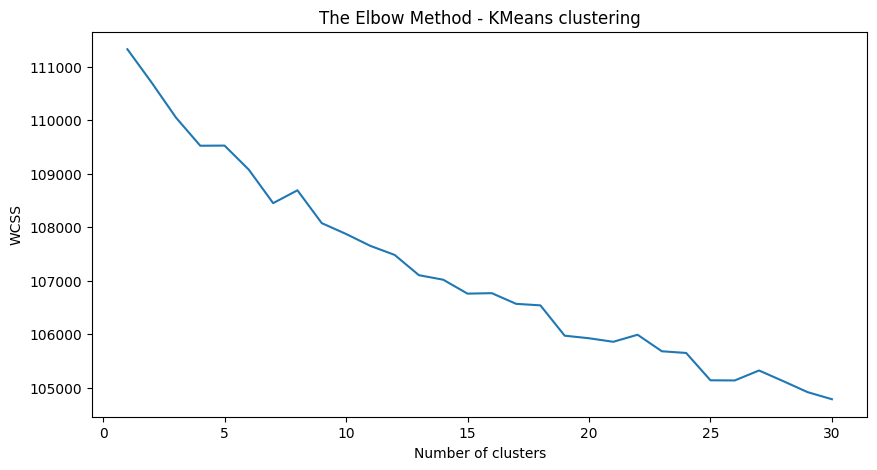

In [ ]:
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(df_vectorized)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(df_vectorized)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(df_vectorized, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

NameError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***